# EDA & Visualization

Slides based on DS100, Deborah Nolan

## Outline
* Exploratory Data Analysis
* Visualization Guidelines
* Visualization Techniques

## Exploratory Data Analysis (EDA)

Painting a picture of the data

### Steps to EDA

Examine data and its context:
- What is the data generating process (DGP)?
- **Structure**: what is the file type? size?
- **Granularity**: what does each datum represent?
- **Scope**: how (in)complete is the data?
- **Temporality**: how is the situated in time?
- **Faithfulness**: how well is the DGP represented?

### The 'what' of EDA

Examime the data with respect to concepts on previous slide!
* Univariate analysis: examine at each atrribute individually.
    - What kind of data is it?
    - What is the distribution?
    - What is the missingness? how severe is it?
* Bivariate analysis: understand fields in terms of each other.
    - Stratify univariate analyses by category (e.g. grades by major)
    - Shapes of scatterplots

### The 'how' of EDA

* Summarize/Visualize your data (tables, plotting, smoothing)
* Undestand the summarization in terms of the data generating process
* Identify outliers and unfaithful data
* Apply data transformations and corrections
* **Record everything you do!**

# Visualization and EDA

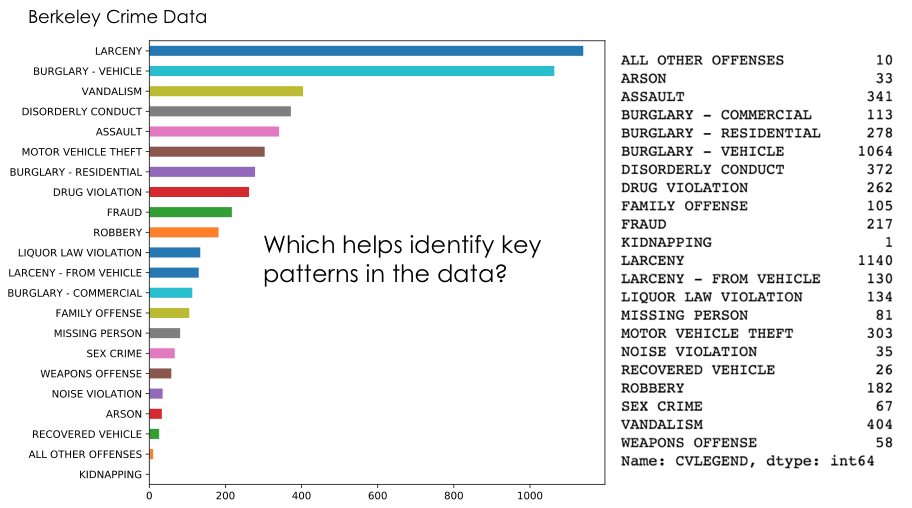

## Visualizing Univariate Relationships

* Quantitative Data
    - Histograms, Box Plots, Rug Plots, Smoothed Interpolations (KDE – Kernel Density Estimators)
    - Look for spread, shape, modes, outliers, unreasonable values …
* Nominal & Ordinal Data
    - Bar plots (sorted by frequency or oridinal dimension)
    - Look for skew, frequent and rare categories, or invalid categories
    - Consider grouping categories and repeating analysis

### Histograms, Rug Plots, and KDE Interpolation

Describes distribution of data – relative prevalence of values
* Histogram
    - relative frequency of values 
    - Tradeoff of bin sizes
* Rug Plot
    - Shows the actual data  locations
* Smoothed density estimator
    - Tradeoff of “bandwidth”  parameter (more on this later) 
    
![](imgs/hist_rug_kde.png)    

### Box charts and violin plots

* Useful for summarizing distributions and comparing multiple distributions

<div class="image-txt-container">
    
<img src="imgs/box.png" width="50%">



<img src="imgs/violin_plot.png" width="50%">

</div>

### Bar Charts
* Used to cimpare nominal and ordinal data
    - Consider sorting by category or frequency
    
![](imgs/bar.png)    

### Visualizing Multivariate Relationships

* Conditioning on a range of values (e.g., ages in groups) and construct side by side box-plots or bar charts

![](imgs/multivar.png)

# EDA, with a tour of visualizations in python

## Kaiser Permanente Health Study

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
path = os.path.join('data', 'births.csv')
births = pd.read_csv(path)

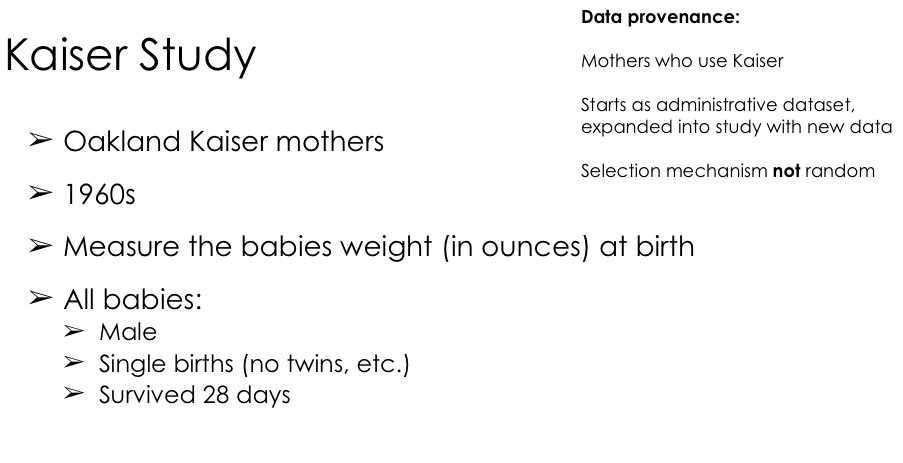

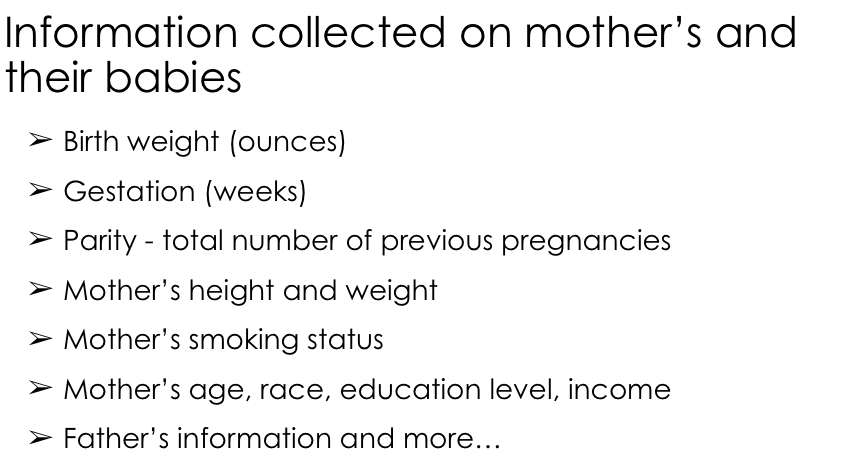

### Import visualization tools

In [ ]:
# plotting in the notebook magic
%matplotlib inline       
import matplotlib.pyplot as plt    # low-level plotting library
import seaborn as sns            # fancy, easy to use statistical plots

In [ ]:
# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

### Univariate Analysis: Quantitative Variable
* Pandas histogram plot
* Seaborn density curve & rug plot


* Note: What is the `<matplotlib.axes._subplots.AxesSubplot at ...>`?

In [ ]:
# default pandas plot
births.bwt.plot(kind='hist', bins=25, title='Normalized birth weight distribution of babies')

In [ ]:
ax = sns.distplot(births.bwt, rug=True, hist=False)
ax.set_xlabel("Birth weight in ounces")
ax.set_title("Normalized birth weight distribution of babies")

### `matplotlib.axes` objects

* When using `.plot()`, the cell magic `matplotlib inline` automatically 'plots to screen'.
* The `<matplotlib.axes._subplots.AxesSubplot at ...>` is the printing of the *last evaluated statement*
    - The `.plot()` returns a `matplotlib.axes` Subplot object!
    - These objects can be assigned a name and manipulated

In [ ]:
ax = sns.distplot(births.bwt, rug=False, hist=True, hist_kws={'density': True, 'normed': None})
#ax.set_xlabel("Birth weight in ounces")
#ax.set_title("Normalized birth weight distribution of babies")

## Qualitative variable: education level
* Bar charts
* Which plot do you think is best?

In [ ]:
# plt.subplots -- we'll get here later
fig, axes = plt.subplots(1,3, sharey=True, figsize=(13,5))

# ordered by count
births.edu.value_counts().to_frame().plot(kind='bar', ax=axes[0], title='plot 1')

# ordered using list=order
order = ['No HS', 'Some HS', 'HS', 'Trade', 'Some College', 'College']
births.edu.value_counts().to_frame().loc[order].plot(kind='bar', ax=axes[1], title='plot 2')

# larger width bar
order = ['No HS', 'Some HS', 'HS', 'Trade', 'Some College', 'College']
births.edu.value_counts().to_frame().loc[order].plot(kind='bar', width=0.75, ax=axes[2], title='plot 3');

### Qualitative variable: 

* dotchart/stripcharts
* Widths have no meaning in bar chart
* Dot plot focuses on comparison of the values

In [ ]:
cnts_by_edu = births.edu.value_counts().loc[order].reset_index().rename(columns={'edu': 'counts', 'index': 'education'})
ax = sns.stripplot(data=cnts_by_edu, x='counts', y='education');
ax.set_title('number of mothers by education level');

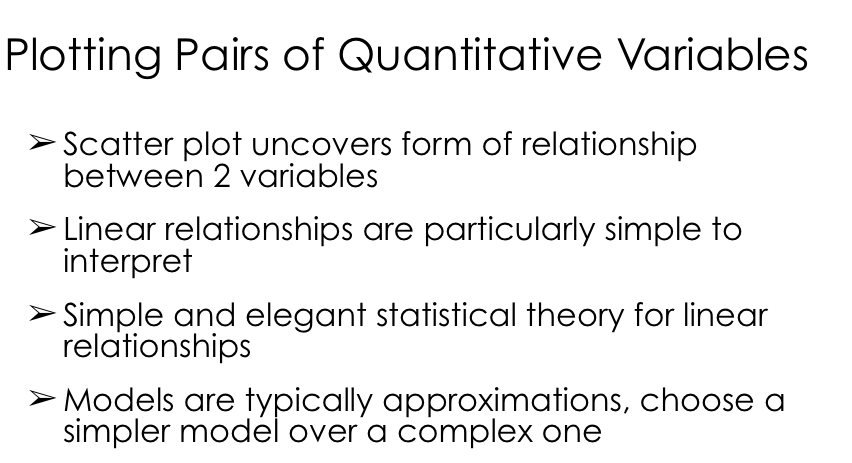

# Pairs of quantitative variables

In [ ]:
births.plot(kind='scatter', y='bwt', x='gestation', title='birth weight by gestation');

In [ ]:
# Plot them *all*
pd.plotting.scatter_matrix(births);

## Pairs of Qualitative Variables

* Understanding smoking trends by education level
* What is the difference between the two plots?

In [ ]:
cnts = births.pivot_table(index='smoke', columns='edu', values='age', aggfunc='size')
avgs = cnts.apply(lambda x:x/x.sum(), axis=1)

fig, axes = plt.subplots(1,2, figsize=(15,6))

cnts.plot(kind='bar', width=0.8, ax=axes[0])
avgs.plot(kind='bar', width=0.8, ax=axes[1], legend=False);
plt.suptitle('smoking trends by education level', fontsize=18);

### matplotlib's `axes` and `figure` objects

* An `axes` object is a container holding a single plot.
* A `figure` object is a container holding multiple `axes`

### Mixing quantitative and qualitative

* Side-by-side box plots / violin plots
* Summarize distributions by category

In [ ]:
ax = sns.boxplot(data=births, x='smoke', y='bwt')
ax.set_xlabel('smoking status')
ax.set_xticklabels(['never', 'now', 'once', 'until'])
ax.set_title('birth weight by maternal smoking status');

In [ ]:
ax = sns.violinplot(data=births, x='smoke', y='bwt', rot=90)
ax.set_xlabel('smoking status')
ax.set_xticklabels(['never', 'now', 'once', 'until'])
ax.set_title('birth weight by maternal smoking status');

### Mixing quantitative and qualitative

* Pverlaid histograms and densities

In [ ]:
(
    births
    .loc[births.smoke.isin(['smokes now', 'never'])]
    .groupby('smoke')
    .bwt
    .plot(kind='hist', alpha=0.3, legend=True, density=True, title='distribution of birth weight')
);

In [ ]:
(
    births
    .loc[births.smoke.isin(['smokes now', 'never'])]
    .groupby('smoke')
    .bwt
    .plot(kind='kde', legend=True, title='density of birth weight')
);

## Examples of Plots that Need Improvement

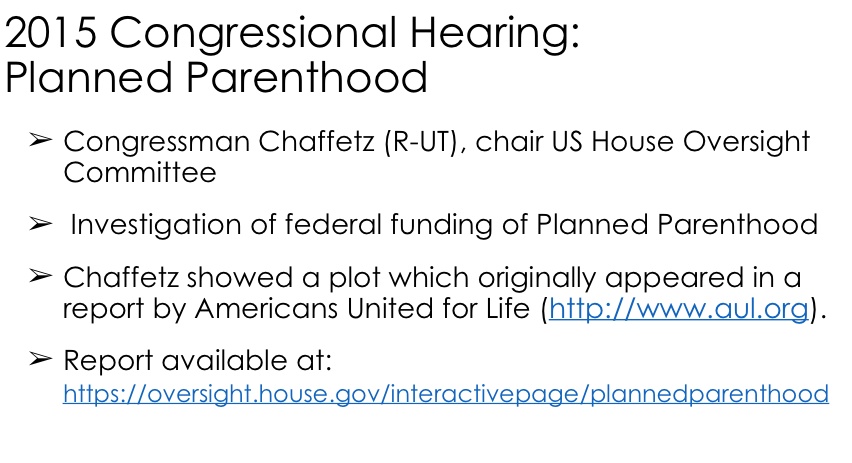

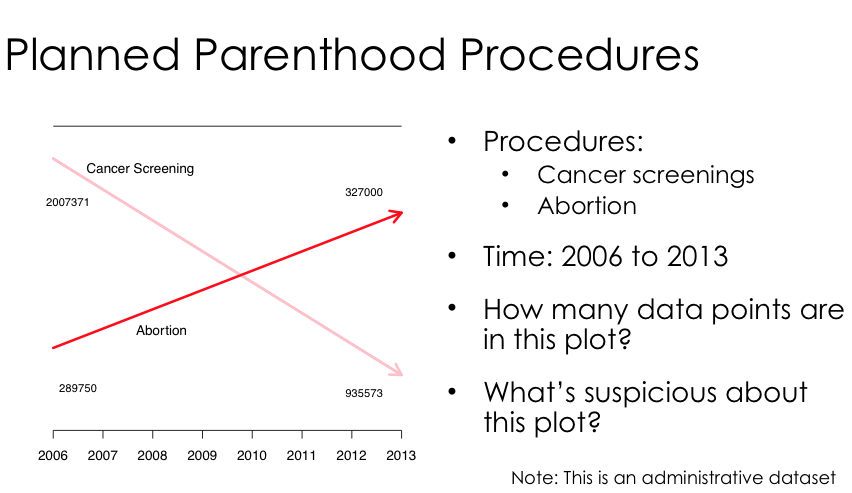

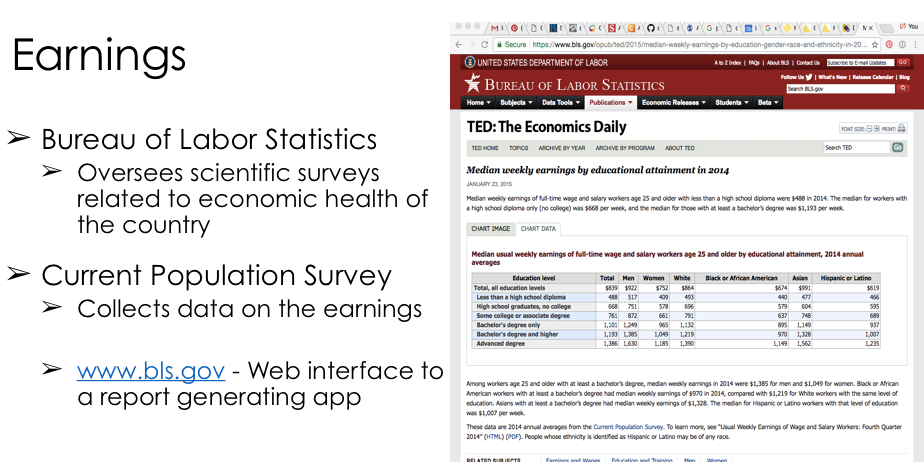

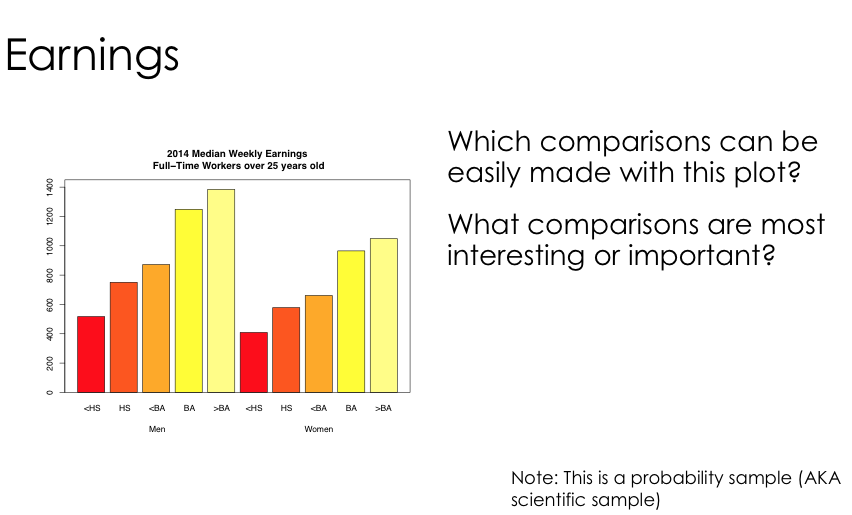

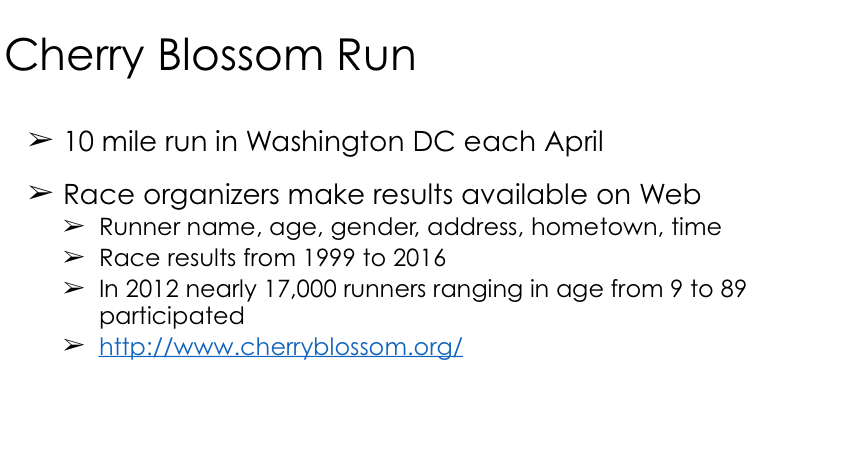

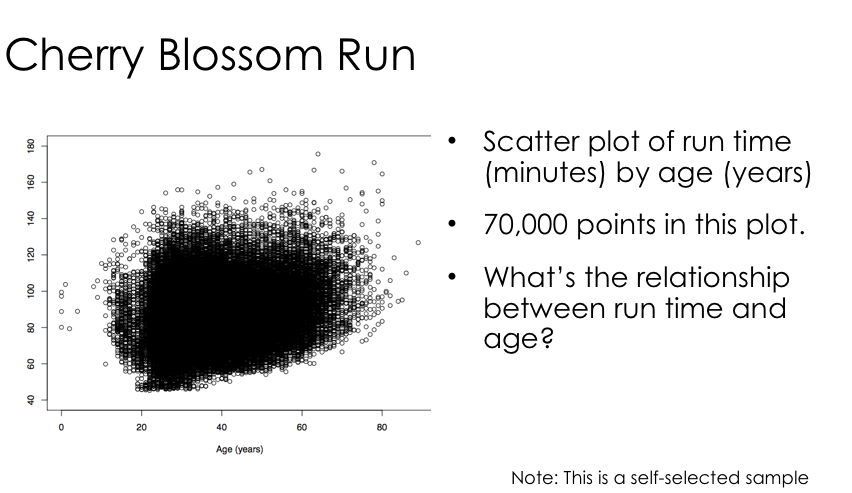

# Scale

### Missing data in the Kaiser study
* How much of each column is missing?
* All bars on same scale (goode)
* What information does this plot communicate?
* What is information doesn't it communicate?

In [ ]:
births.count().plot(kind='bar', title='Count of missing values');

In [ ]:
# this one?
births.isnull().mean().plot(kind='bar', title='proportion of missing values');

### Choosing the scale

* Choose axis limit to fill the plotting region
* If necessary, 
    - Zoom in to focus on region with bulk of data 
    - Make multiple plots of different regions 
    - Transform data to improve resolution

* Don’t change scale mid-axis 
* Don’t use two different scales for the same axis

# Conditioning

### Plotting quantitative variables by level(s)
* Emphasizes differences between groups and trends
* Placement on same scale makes it easy to compare smoker/non-smokers
* Packs a lot of information in one plot!

In [ ]:
smoke_vs_never = births.loc[births.smoke.isin(['never', 'smokes now'])]

In [ ]:
order = ['No HS', 'Some HS', 'HS', 'Trade', 'Some College', 'College']
ax = (
    smoke_vs_never
    .reset_index()
    .pivot_table(index='edu', columns='smoke', values='mweight', aggfunc='mean')
    .loc[order]
    .plot(title='average weight by education level')
)
ax.set_xticklabels([''] + order);

# Perception

### Kinds of data color

* Qualitative data should have a color scheme that makes it easy to distinguish between categories
* Quantitative data should have continuous gradients of color scheme that implies magnitude
    - Light colors correspond to low values.
    - Do both low and high value deserve equal emphasis? Use a diverging scheme where light colors represent middle values. 


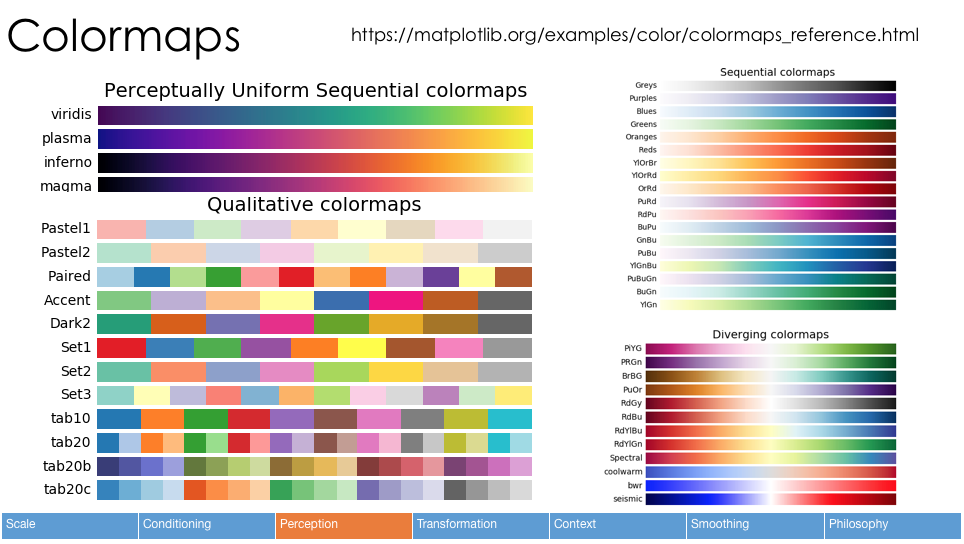

### Color schemes in scatterplots

In [ ]:
births.head()

In [ ]:
# requires seaborn 0.9.0
# conda install -c conda-forge seaborn==0.9.0
# pip install --user seaborn==0.9.0

sns.scatterplot(data=births, y='bwt', x='gestation', hue='smoke', alpha=0.5);

In [ ]:
sns.scatterplot(data=births, y='gestation', x='bwt', hue='parity', alpha=0.5);

### Note: jittering scatterplots

* Hard to see many dots on top of each other.
* Solution: perturb by a small random number

In [ ]:
sns.scatterplot(data=births, x='age', y='gestation');

In [ ]:
ages = births.age + np.random.normal(0,0.5, size=len(births))
sns.scatterplot(y=births.gestation, x=ages, alpha=0.5);

# Transformations

## Scaling transformations

**Why Transform Variables?**

* Reveal distribution of most of the observations (otherwise much of the data is squashed in a small region)
* Reveal anomalies on the "other side" of the data
* Numerical summaries of transformed data are better summaries of a symmetric distribution 
* Logarithmic transformations take care of most needs.



## Distribution of ticket fares for each passenger

* This histogram shows the all the fares, 
* it is difficult to see detailed patterns in the data since the fares are clumped on the left side of the histogram. 
* Solution: take the natural log of the fares before plotting them.

<img src="imgs/titanic.png" width="60%">


## Distribution of ticket fares for each passenger, after taking the log


We can see from the plot of the log data that:
* the distribution of fares has a mode at roughly $e^2 = 7.40$  
* the distribution has a smaller mode at roughly  $e^{3.4} = 30.00$
* Why does plotting the natural log of the data help with skew? Discuss

<img src="imgs/titanic_log.png" width="60%">


### Why log transformations help:

The logarithms of large numbers tend be close to the logarithms of small numbers:

|value |log(value)|
|-|-|
|1|	0.00 |
|10|	2.30 |
|50|	3.91 |
|100|	4.60 |
|500|	6.21 |
|1000|	6.90 |

* This means that taking the logarithm of right-tailed data will bring large values close to small values. 
* This helps see patterns where the majority of the data lie.

# Smoothing

## Smoothing

* Smoothing allows us to:
    - more clearly visualize data when we have many data points.
    - see trends in noisy data
    - helps guide our further analysis

* A Small Dataset (10 values 0.7, 0.8, 0.9, 2.1, 2.2, 2.8, 2.9, 3.1, 3.6, 4.8)
* Each value is 1/10 of the sample


<img src="imgs/small_dataset.png" width="80%">

We smooth these 1/10 point masses

**Because:**

* this is a sample and we believe that other values near the ones we observed are reasonable
* we want to focus on general structure rather than individual observations.
<img src="imgs/small_dataset.png" width="80%">

### A histogram smooths

* We want to smooth out these 1/10 point masses  because this is a sample and we believe that other values near the ones we observed are reasonable
* we want to focus on general structure rather than individual observations
* The values 3.1, 3.6, and 4.8 have their empirical mass (3/10) spread over the bin [3,5] 


<img src="imgs/hist_smooth.png" width="60%">

### Kernel Density Estimate (KDE))

Consider one point. Smooth it's empirical mass with a kernel function, rather than a histogram bin


<img src="imgs/KDE.png" width="60%">

### KDE - 3 points

<img src="imgs/KDE_3_points.png" width="60%">

### KDE - 3 points

<img src="imgs/KDE_three_points_1.png" width="60%">

### KDE - 3 points

<img src="imgs/KDE_three_points_3.png" width="60%">

### KDE - 3 points

Sum the 3 kernels at each point to get the density curve 
$K_h$ is the Kernel function. $h$ refers to how peaked / spread the kernel is 

<img src="imgs/KDE_formula.png" width="60%">


Back to our set of 10 values: 0.7, 0.8, 0.9, 2.1, 2.2, 2.8, 2.9, 3.1, 3.6, 4.8


<img src="imgs/hist_KDE.png" width="80%">

# Summary

### Reveal the data
* Choose scale appropriately
* Avoid having other graph elements interfere with data
* Use visually prominent symbols
* Eliminate superfluous material, aka chart junk
* Avoid plotting too many/few data points.

### Facilitate Comparisons

* Put Juxtaposed plots on same scale
* Make it easy to distinguish elements of superimposed plots, e.g. with color, line type
* Avoid angles, extra dimensions (e.g., prefer lines over areas)
* Don’t break the visual metaphor, i.e., if using rectangles, then area should correspond to value 

### Make a plot information rich

* Describe what you see in the Caption
* Add context with Reference Markers (lines and points) including text
* Add Legends and Labels
* Use color and plotting symbols to add more information
* Plot the same thing more than once in different ways/scales
* Reduce clutter

### Captions
* Captions should be comprehensive
* Self-contained
* Captions should:
    - Describe what has been graphed
    - Draw attention to important features
    - Describe conclusions drawn from graph

### Good Plot Making Practice 
* Put major (quantitative) conclusions in graphical form
* Provide reference information
* Proof read for clarity and consistency
* Graphing is an iterative process
* Multiplicity is OK, i.e., two plots of the same variable may provide different messages
* Make plots data rich 

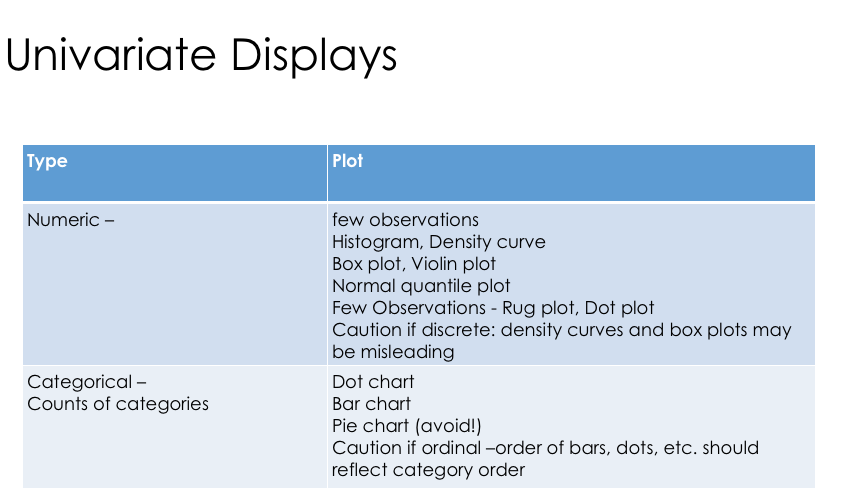

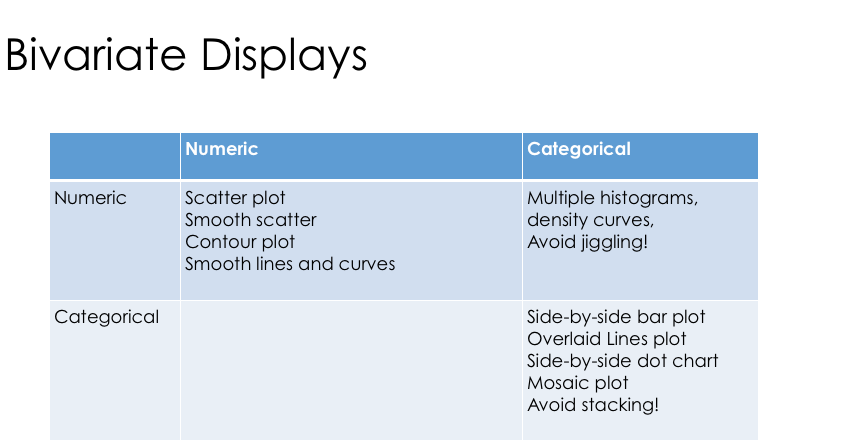